In [ ]:
# Adım 1: Gerekli kütüphaneleri içe aktarma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Adım 2: Veri setini yükleme
print("Adım 2: Veri setini yükleme")
df = pd.read_csv('/content/Mall_Customers.csv')
print("Veri seti başarıyla yüklendi!")

# Veri setinin ilk 5 satırını görüntüleme
print("\nVeri setinin ilk 5 satırı:")
print(df.head())

# Veri setinin boyutunu görüntüleme
print(f"\nVeri seti boyutu: {df.shape}")

Adım 2: Veri setini yükleme
Veri seti başarıyla yüklendi!

Veri setinin ilk 5 satırı:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Veri seti boyutu: (200, 5)



Adım 3: Analiz için 'Annual Income (k$)' ve 'Spending Score (1-100)' özelliklerini seçme
Seçili özellikler shape: (200, 2)

Adım 4: Verileri ölçeklendirme (standardizasyon)
Veriler ölçeklendirildi.

Adım 5: Optimal küme sayısını belirlemek için dirsek yöntemi uygulanıyor...


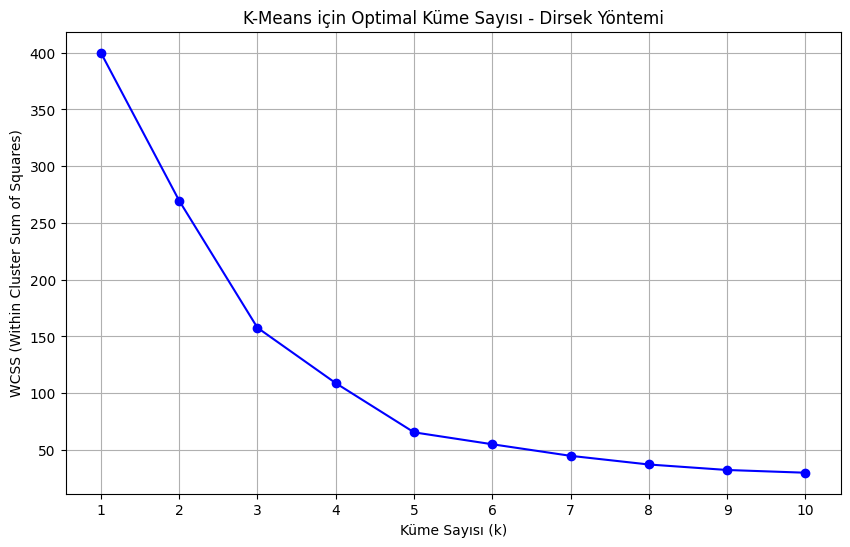


Adım 6: Optimal küme sayısı belirlendi, K-Means modelini eğitiyoruz...
K-Means modeli 5 küme için eğitildi.

Adım 7: Kümeleme sonuçlarını görselleştirme


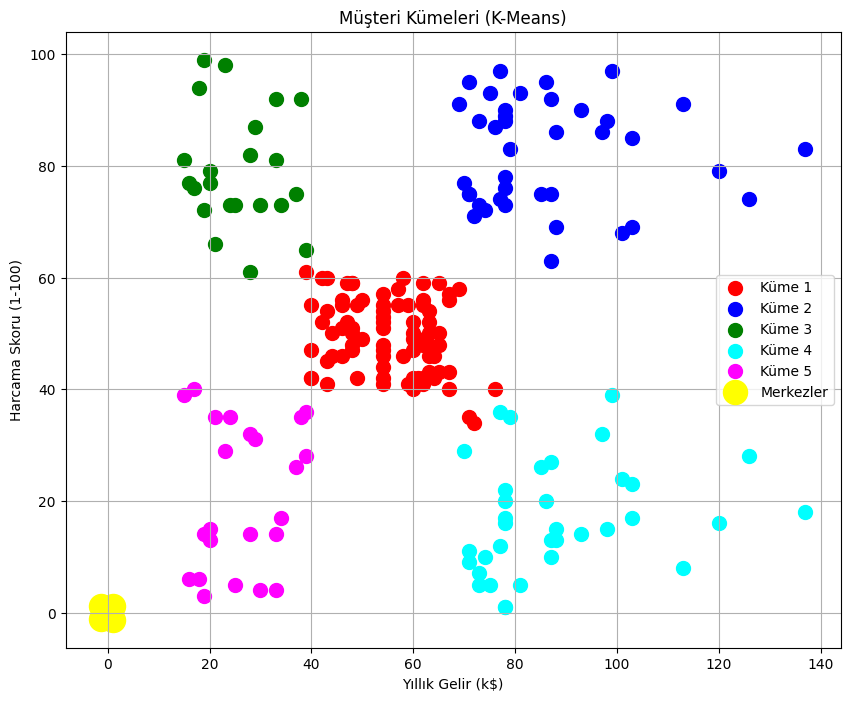


Adım 8: Kümeleme sonuçlarını veri setine ekleme
Küme atamaları veri setine eklendi.
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  

Adım 9: Her küme için istatistiksel özetler

Küme 1 İstatistikleri:
Küme Boyutu: 81
       Annual Income (k$)  Spending Score (1-100)
count           81.000000               81.000000
mean            55.296296               49.518519
std              8.988109                6.530909
min             39.000000               34.000000
25%             48.000000               44.000000
50%    

In [ ]:
# Adım 3: Kullanılacak özellikleri seçme
print("\nAdım 3: Analiz için 'Annual Income (k$)' ve 'Spending Score (1-100)' özelliklerini seçme")
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
print("Seçili özellikler shape:", X.shape)

# Adım 4: Verileri ölçeklendirme
print("\nAdım 4: Verileri ölçeklendirme (standardizasyon)")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Veriler ölçeklendirildi.")

# Adım 5: Optimal küme sayısını belirleme (Dirsek Yöntemi)
print("\nAdım 5: Optimal küme sayısını belirlemek için dirsek yöntemi uygulanıyor...")
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Dirsek yöntemini görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='blue')
plt.title('K-Means için Optimal Küme Sayısı - Dirsek Yöntemi')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

# Adım 6: Optimal küme sayısına göre K-Means modelini eğitme
# Dirsek yönteminde grafiğe bakarak optimal küme sayısı belirlenecek
print("\nAdım 6: Optimal küme sayısı belirlendi, K-Means modelini eğitiyoruz...")
optimal_clusters = 5  # Grafiğe bakarak belirlenecek, varsayılan olarak 5 kullanıldı
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
print(f"K-Means modeli {optimal_clusters} küme için eğitildi.")

# Adım 7: Kümeleme sonuçlarını görselleştirme
print("\nAdım 7: Kümeleme sonuçlarını görselleştirme")
plt.figure(figsize=(10, 8))
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], s=100, c='red', label='Küme 1')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s=100, c='blue', label='Küme 2')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], s=100, c='green', label='Küme 3')
plt.scatter(X[clusters == 3, 0], X[clusters == 3, 1], s=100, c='cyan', label='Küme 4')
plt.scatter(X[clusters == 4, 0], X[clusters == 4, 1], s=100, c='magenta', label='Küme 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Merkezler')
plt.title('Müşteri Kümeleri (K-Means)')
plt.xlabel('Yıllık Gelir (k$)')
plt.ylabel('Harcama Skoru (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# Adım 8: Kümeleme sonuçlarını veri setine ekleme
print("\nAdım 8: Kümeleme sonuçlarını veri setine ekleme")
df['Cluster'] = clusters
print("Küme atamaları veri setine eklendi.")
print(df.head())

# Adım 9: Her küme için istatistiksel özet
print("\nAdım 9: Her küme için istatistiksel özetler")
for i in range(optimal_clusters):
    print(f"\nKüme {i+1} İstatistikleri:")
    cluster_data = df[df['Cluster'] == i]
    print(f"Küme Boyutu: {len(cluster_data)}")
    print(cluster_data[['Annual Income (k$)', 'Spending Score (1-100)']].describe())

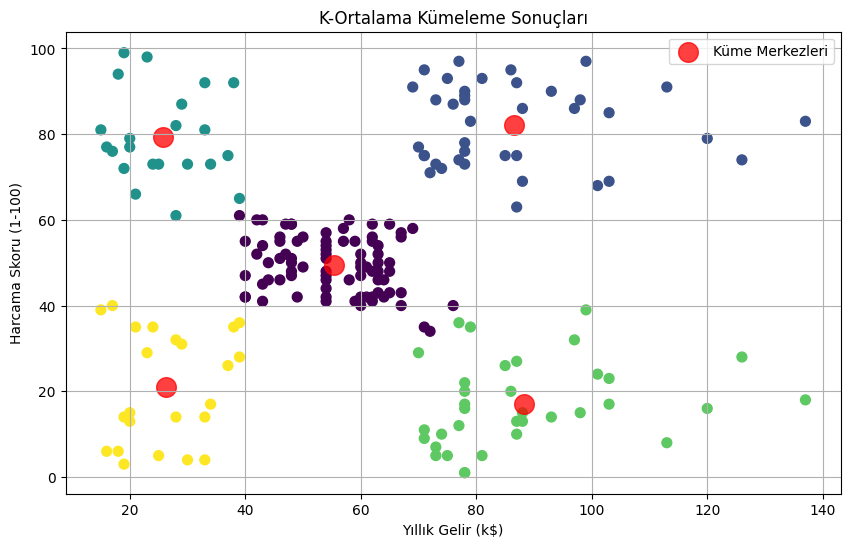

Küme etiketleri:
[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]

Küme merkezleri:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]

Küme bilgisi eklenmiş veri setinin ilk 5 satırı:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4 

In [ ]:

# 1 K-ortalama modelini oluşturma ve eğitme
n_clusters = 5
random_state = 42
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
y_kmeans = kmeans.fit_predict(X)

# 2 Küme merkezlerini alma
centers = kmeans.cluster_centers_

# 3 Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Küme Merkezleri')
plt.title('K-Ortalama Kümeleme Sonuçları')
plt.xlabel('Yıllık Gelir (k$)')
plt.ylabel('Harcama Skoru (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# Küme etiketlerini yazdırma
print("Küme etiketleri:")
print(y_kmeans)

# Küme merkezlerini yazdırma
print("\nKüme merkezleri:")
print(centers)

# Veri setine küme bilgisini ekleme
df['Cluster'] = y_kmeans
print("\nKüme bilgisi eklenmiş veri setinin ilk 5 satırı:")
print(df.head())

Küme Sayısı: 2, Ortalama Siluet Skoru: 0.3956
Küme Sayısı: 3, Ortalama Siluet Skoru: 0.4676
Küme Sayısı: 4, Ortalama Siluet Skoru: 0.4938
Küme Sayısı: 5, Ortalama Siluet Skoru: 0.5539
Küme Sayısı: 6, Ortalama Siluet Skoru: 0.5128
Küme Sayısı: 7, Ortalama Siluet Skoru: 0.5017
Küme Sayısı: 8, Ortalama Siluet Skoru: 0.4963
Küme Sayısı: 9, Ortalama Siluet Skoru: 0.4559
Küme Sayısı: 10, Ortalama Siluet Skoru: 0.4426


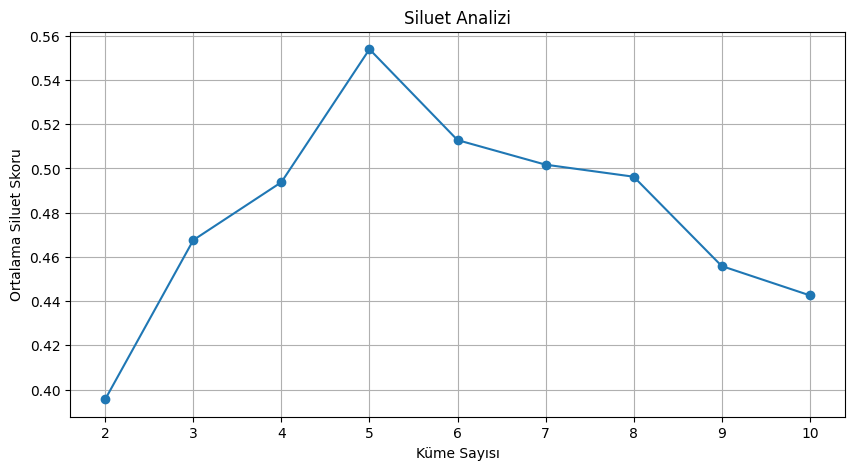


En yüksek siluet skoruna sahip küme sayısı: 5
Siluet skoru: 0.5539


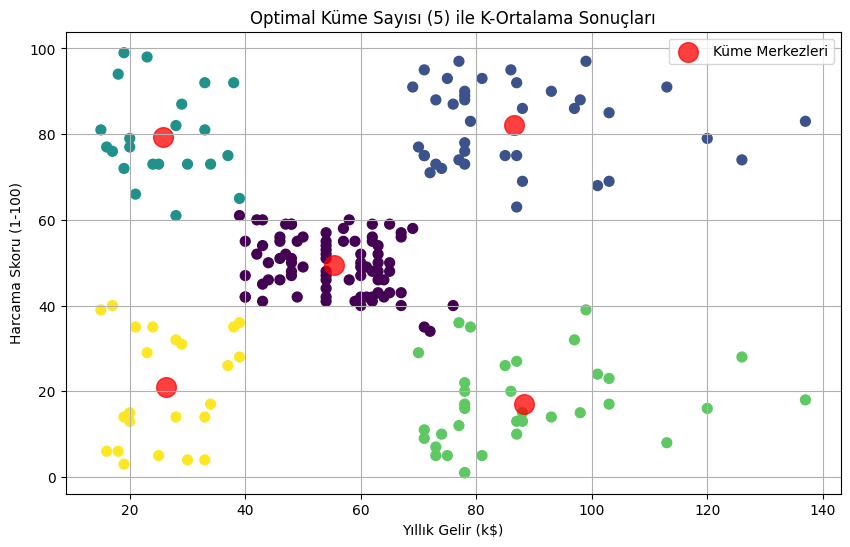

In [ ]:


# Siluet analizi için küme sayısı aralığını belirleme
random_state = 42
range_n_clusters = list(range(2, 11))  # 2'den 10'a kadar küme sayılarını test edeceğiz

# 2. Siluet Analizi
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"Küme Sayısı: {n_clusters}, Ortalama Siluet Skoru: {silhouette_avg:.4f}")

# Siluet Skoru Grafiğini Çizme
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Siluet Analizi')
plt.xlabel('Küme Sayısı')
plt.ylabel('Ortalama Siluet Skoru')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# En iyi siluet skoruna sahip küme sayısını belirleme
optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"\nEn yüksek siluet skoruna sahip küme sayısı: {optimal_clusters}")
print(f"Siluet skoru: {max(silhouette_scores):.4f}")

# En iyi küme sayısı ile K-Means modelini eğitme
best_kmeans = KMeans(n_clusters=optimal_clusters, random_state=random_state, n_init='auto')
best_clusters = best_kmeans.fit_predict(X)
best_centers = best_kmeans.cluster_centers_

# Optimal küme sayısı ile sonuçları görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=best_clusters, s=50, cmap='viridis')
plt.scatter(best_centers[:, 0], best_centers[:, 1], c='red', s=200, alpha=0.75, label='Küme Merkezleri')
plt.title(f'Optimal Küme Sayısı ({optimal_clusters}) ile K-Ortalama Sonuçları')
plt.xlabel('Yıllık Gelir (k$)')
plt.ylabel('Harcama Skoru (1-100)')
plt.legend()
plt.grid(True)
plt.show()
